In [1]:
from hurricanes.models import rtofs
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style='whitegrid')

In [2]:
extent = [-75.5, -65, 34, 42] # cartopy extent format

t0 = pd.Timestamp(2021, 10, 2, 12, 0, 0) # start time
t1 = pd.Timestamp(2022, 2, 5, 12, 0, 0) # end time

In [3]:
dates = pd.date_range(t0, t1, freq='12H')
dates

DatetimeIndex(['2021-10-02 12:00:00', '2021-10-03 00:00:00',
               '2021-10-03 12:00:00', '2021-10-04 00:00:00',
               '2021-10-04 12:00:00', '2021-10-05 00:00:00',
               '2021-10-05 12:00:00', '2021-10-06 00:00:00',
               '2021-10-06 12:00:00', '2021-10-07 00:00:00',
               ...
               '2022-02-01 00:00:00', '2022-02-01 12:00:00',
               '2022-02-02 00:00:00', '2022-02-02 12:00:00',
               '2022-02-03 00:00:00', '2022-02-03 12:00:00',
               '2022-02-04 00:00:00', '2022-02-04 12:00:00',
               '2022-02-05 00:00:00', '2022-02-05 12:00:00'],
              dtype='datetime64[ns]', length=253, freq='12H')

In [4]:
ds = rtofs()

# Save rtofs lon and lat as variables to speed up indexing calculation
grid_lons = ds.lon.values[0,:]
grid_lats = ds.lat.values[:,0]
grid_x = ds.x.values
grid_y = ds.y.values

# Find x, y indexes of the area we want to subset
lons_ind = np.interp(extent[:2], grid_lons, grid_x)
lats_ind = np.interp(extent[2:], grid_lats, grid_y)

extent = np.floor(lons_ind[0]).astype(int), np.ceil(lons_ind[1]).astype(int), np.floor(lats_ind[0]).astype(int), np.ceil(lats_ind[1]).astype(int)

In [5]:
ds = ds.sel(time=dates, method='nearest').isel(x=slice(extent[0], extent[1]), y=slice(extent[2], extent[3]))
ds

<xarray.Dataset>
Dimensions:      (depth: 40, y: 128, x: 132, time: 253)
Coordinates:
  * depth        (depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * y            (y) int32 454 455 456 457 458 459 ... 576 577 578 579 580 581
  * x            (x) int32 308 309 310 311 312 313 ... 434 435 436 437 438 439
  * time         (time) datetime64[ns] 2021-10-02T12:00:00 ... 2022-02-05T12:...
    lat          (y, x) float32 34.04 34.04 34.04 34.04 ... 42.03 42.03 42.03
    lon          (y, x) float32 -75.44 -75.36 -75.28 ... -65.12 -65.04 -64.96
Data variables:
    date         (time) float64 ...
    u            (time, depth, y, x) float32 ...
    v            (time, depth, y, x) float32 ...
    temperature  (time, depth, y, x) float32 ...
    salinity     (time, depth, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       ftp://ftp.ncei.noaa.gov/pub/data/nccf/com/rtofs/prod/
    experiment:   92.8
    history:      archv2ncdf3z
    region:       Atlantic/US East Coast
    comment:      This dataset contains the first 4 full volume forecasts (f0...
    model:        RTOFS

In [17]:
# ds_0 = ds.sel(depth=0).load().mean('time')
ds_50 = ds.sel(depth=50).load().mean('time')
ds_100 = ds.sel(depth=100).load().mean('time')
ds_200 = ds.sel(depth=200).load().mean('time')

KeyboardInterrupt: 

In [10]:
def percentile(da, min=2, max=98):
    vmin = np.floor(np.nanpercentile(da, min))
    vmax = np.ceil(np.nanpercentile(da, max))
    return vmin, vmax

In [13]:
df = ds0.to_dataframe().reset_index()

(11.0, 26.0)

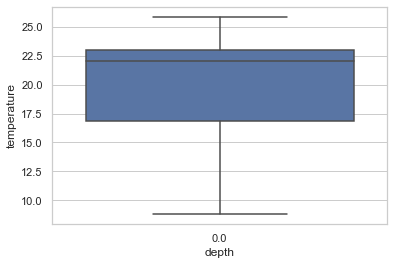

In [15]:
sns.boxplot(x='depth', y="temperature", data=df)
percentile(df['temperature'])

(32.0, 37.0)

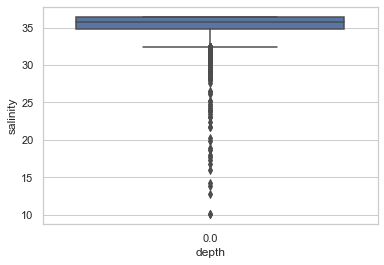

In [16]:
sns.boxplot(x='depth', y="salinity", data=df)
percentile(df['salinity'])